### install R kernel on jupyter. Follow the slides of W1.
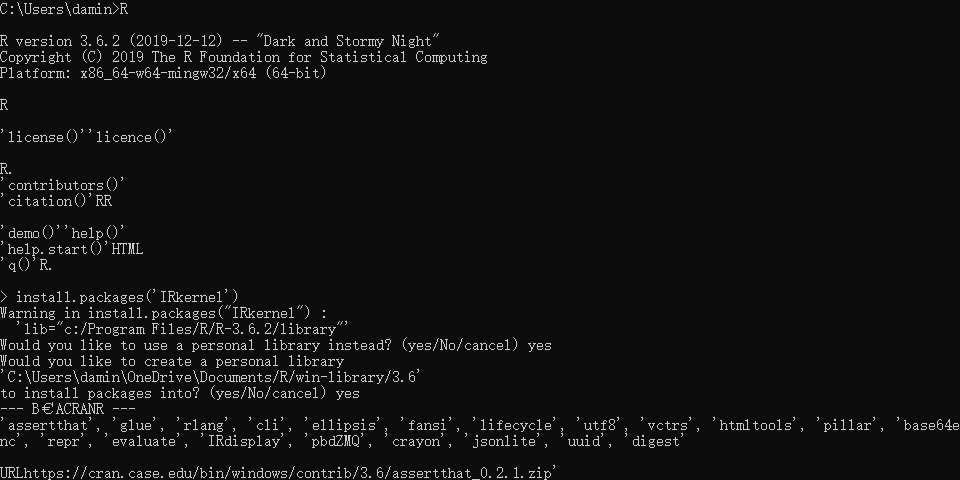

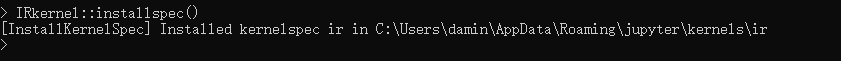

In [1]:
install.packages("sparklyr")

Installing package into 'C:/Users/damin/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'sparklyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\damin\AppData\Local\Temp\RtmpacUOxk\downloaded_packages


In [2]:
packageVersion("sparklyr")

[1] '1.5.2'

In [3]:
library(sparklyr)

Warning message:
"package 'sparklyr' was built under R version 3.6.3"


In [3]:
spark_available_versions()

spark
<chr>
1.6
2.0
2.1
2.2
2.3
2.4
3.0


In [ ]:
system("java -version")

https://enos.itcollege.ee/~jpoial/allalaadimised/jdk8/

I installed to D:\Java

C:\Users\damin>java -version

java version "1.8.0_281"

Java(TM) SE Runtime Environment (build 1.8.0_281-b09)

Java HotSpot(TM) 64-Bit Server VM (build 25.281-b09, mixed mode)

In [10]:
spark_install("3.0")

In [11]:
spark_installed_versions()

spark,hadoop,dir
<chr>,<chr>,<chr>
2.4.7,2.7,C:\Users\damin\AppData\Local/spark/spark-2.4.7-bin-hadoop2.7
3.0.1,3.2,C:\Users\damin\AppData\Local/spark/spark-3.0.1-bin-hadoop3.2


Running Spark on Windows requires the Microsoft Visual C++ 2010 SP1 Redistributable Package. Please download and install from:

https://www.microsoft.com/download/en/details.aspx?id=13523

Download Hadoop winutils.exe from:

### if use spark 2.4

https://github.com/steveloughran/winutils/raw/master/hadoop-2.6.0/bin/ 

Copy winutils.exe to 

C:\Users\damin\AppData\Local\spark\spark-2.4.7-bin-hadoop2.7\tmp\hadoop\bin

### if use spark3.0 hadoop3.2, use

https://github.com/steveloughran/winutils/blob/master/hadoop-3.0.0/bin/winutils.exe

copy to C:\Users\damin\AppData\Local\spark\spark-3.0.1-bin-hadoop3.2\tmp\hadoop\bin

### Attention: DO NOT have blank spaces in your path of JAVA_HOME and SPARK_HOME

In [4]:
Sys.setenv(JAVA_HOME = "D:/Java")
Sys.setenv(SPARK_HOME ="C:/Users/damin/AppData/Local/spark/spark-3.0.1-bin-hadoop3.2")

In [14]:
Sys.getenv("JAVA_HOME")

[1] "D:/Java"

In [15]:
Sys.getenv("SPARK_HOME")

[1] "C:/Users/damin/AppData/Local/spark/spark-3.0.1-bin-hadoop3.2"

In [ ]:
# sc <- spark_connect(master = "local")

In [ ]:
# cars <- copy_to(sc, mtcars)

In [ ]:
# cars

In [ ]:
install.packages("ggraph")
install.packages("igraph")
install.packages("graphframes")

In [5]:
library(sparklyr)
library(dplyr)
library(ggraph)
library(igraph)
library(graphframes)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggraph' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'igraph' was built under R version 3.6.3"

Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following object is masked from 'package:sparklyr':

    %->%


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Warning message:
"package 'graphframes' was built under R version 3.6.3"


### install graphframe on spark 3.0

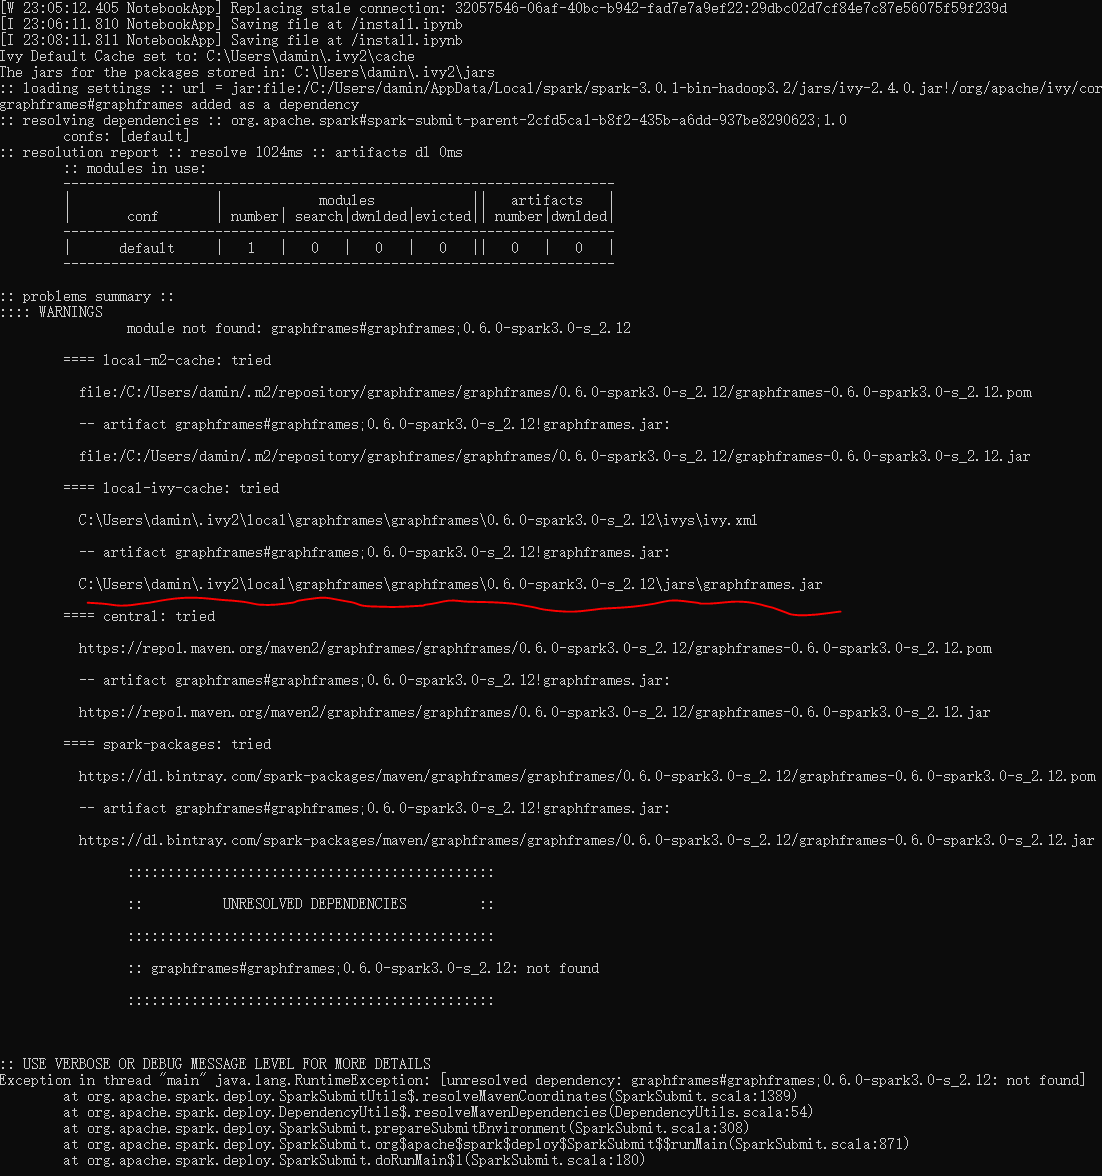

http://dl.bintray.com/spark-packages/maven/graphframes/graphframes/

Your graphframes jar file has to match your spark version

I use spark 3.0 then 

http://dl.bintray.com/spark-packages/maven/graphframes/graphframes/0.8.1-spark3.0-s_2.12/

rename it to graphframes.jar and then store it to

C:\Users\damin\.ivy2\local\graphframes\graphframes\0.6.0-spark3.0-s_2.12\jars

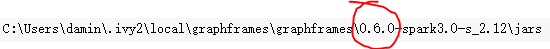
I made the folder name match the version name. 

### Attention, the folder name is not 0.8.1 but 0.6.0 because if you look at the error msg in anaconda prompt, you will see the screenshot above. It shows the spark is searching the jar file at

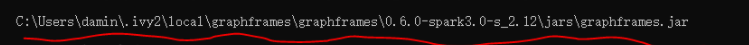

### So, if your graphframe doesn't work, check your anaconda prompt, you will see similar msg and know where to put your graphframes.jar file

### Then everything works.

In [6]:
options(sparklyr.log.console = TRUE)

In [7]:
sc=spark_connect(master = "local")

In [8]:
highschool_tbl <- copy_to(sc, highschool, "highschool", overwrite = TRUE)

In [9]:
highschool_tbl <- copy_to(sc, 
                          highschool, 
                          "highschool", 
                          overwrite = TRUE) %>%
  filter(year == 1957) %>%
  transmute(from = as.character(as.integer(from)),
            to = as.character(as.integer(to)))

In [10]:
from_tbl <- highschool_tbl %>% 
    distinct(from) %>% 
    transmute(id = from)
from_tbl

Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move 

# Source: spark<?> [?? x 1]
   id   
   <chr>
 1 1    
 2 43   
 3 44   
 4 56   
 5 14   
 6 16   
 7 21   
 8 35   
 9 48   
10 5    
# ... with more rows

In [11]:
to_tbl <- highschool_tbl %>% 
    distinct(to) %>% 
    transmute(id = to)
to_tbl

Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move 

# Source: spark<?> [?? x 1]
   id   
   <chr>
 1 43   
 2 44   
 3 14   
 4 16   
 5 21   
 6 35   
 7 48   
 8 5    
 9 52   
10 55   
# ... with more rows

In [12]:
vertices_tbl <- distinct(sdf_bind_rows(from_tbl, to_tbl))
vertices_tbl

Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"
Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move 

# Source: spark<?> [?? x 1]
   id   
   <chr>
 1 1    
 2 43   
 3 44   
 4 56   
 5 14   
 6 16   
 7 21   
 8 35   
 9 48   
10 5    
# ... with more rows

In [13]:
edges_tbl <- highschool_tbl %>% 
    transmute(src = from, dst = to)
edges_tbl

# Source: spark<?> [?? x 2]
   src   dst  
   <chr> <chr>
 1 1     14   
 2 1     15   
 3 1     21   
 4 1     54   
 5 1     55   
 6 2     21   
 7 2     22   
 8 3     9    
 9 3     15   
10 4     5    
# ... with more rows

In [14]:
graph <- gf_graphframe(vertices_tbl, edges_tbl)

Warning message:
"ORDER BY is ignored in subqueries without LIMIT
i Do you need to move arrange() later in the pipeline or use window_order() instead?"


In [15]:
graph

GraphFrame
Vertices:
  Database: spark_connection
  $ id <chr> "1", "43", "44", "56", "14", "16", "21", "35", "48", "5", "52", "55~
Edges:
  Database: spark_connection
  $ src <chr> "1", "1", "1", "1", "1", "2", "2", "3", "3", "4", "4", "4", "4", "~
  $ dst <chr> "14", "15", "21", "54", "55", "21", "22", "9", "15", "5", "18", "1~

In [16]:
gf_degrees(graph)

# Source: spark<?> [?? x 2]
   id    degree
   <chr>  <int>
 1 1          5
 2 43        12
 3 44         2
 4 56         3
 5 14         4
 6 21        14
 7 55        11
 8 5          3
 9 52        11
10 16         6
# ... with more rows